In [1]:
import import_ipynb      #for importing other files in jupyter
import mylibrary_true as ml   #for accessing library
import math
from matplotlib import pyplot as plt  #for plotting

importing Jupyter notebook from mylibrary_true.ipynb


Plotting the solution as calculated using euler forward


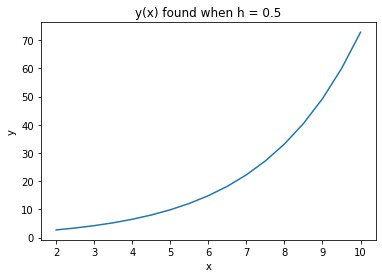

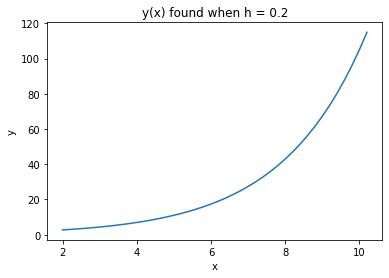

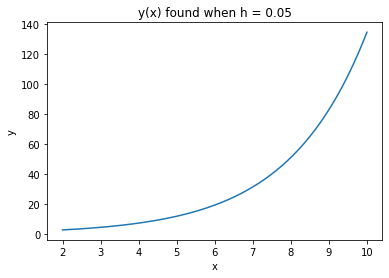

In [2]:
#Question 1
#f = y*log(y)/x


#defining function and 
def func1(x, y, t = 0):
    return y*math.log(y)/x
y0 = math.exp(1)
x0 = 2
xf = 10
d1 = 0.5 
d3 = 0.05
d2 = 0.2

print("Plotting the solution as calculated using euler forward")
ml.Deq.euler_forward(func1, x0, y0, xf, d1, True)
ml.Deq.euler_forward(func1, x0, y0, xf, d2, True)
ml.Deq.euler_forward(func1, x0, y0, xf, d3, True)

Plotting the solution as calculated using predictor corrector


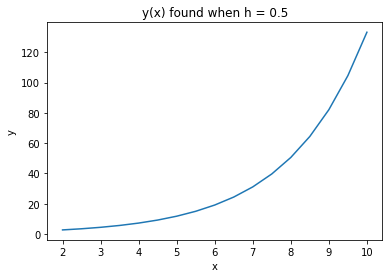

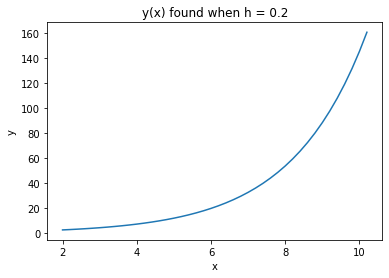

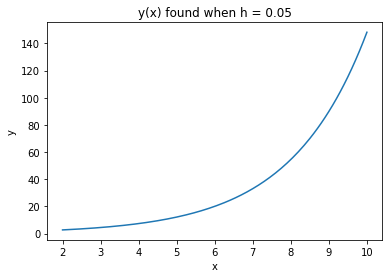

In [3]:
print("Plotting the solution as calculated using predictor corrector")
ml.Deq.pred_corr(func1, x0, y0, xf, d1, True)
ml.Deq.pred_corr(func1, x0, y0, xf, d2, True)
ml.Deq.pred_corr(func1, x0, y0, xf, d3, True)

In [4]:
#Question 2
#NOTE THE CHANGE OF VARIABLES
#differentiating variable is taken as t instead of the x given in the question
#y -> x_0
#dy/dx -> x_1

#f1 = x_1
#f2 = 1 - x_0 - x_1

def f1(X, t = 0):
    return X[1]
def f2(X, t):
    return 1 - t - X[1]
F = [f1, f2]

h1 = 0.05
h2 = -0.05
t0 = 0      #initial condition to is taken when t = 0
tf1 = 5     #we will first loop from 0 to 5
tf2 = -5    #then we will loop from 0 to -5 and then add both the lists
X = [2, 1]  #Initial condition y(0) and y'(0) as given in the question paper, here they are X[0] and X[1] at t = 0

V1, T1 = ml.Deq.RK4_ON(X, t0, tf1, F, 2, h1)
X = [2, 1]
V2, T2 = ml.Deq.RK4_ON(X, t0, tf2, F, 2, h2)
#Here V contains the progression of X_0 and X_1 with t in two seperate lists inside it i.e. V = [[X_0], [X_1]]

T = T1 + T2        #x
X0 = V1[0] + V2[0] #y(x)
X1 = V1[1] + V2[1] #y'(x)

In [5]:
#defining the analytical function

def y(x):
    c1 = 1
    c2 = 1 #found by solving the analytical function
    return c1 + c2*math.exp(-x) - x*x/2 + 2*x

i = -5
h = 0.05
variable = []
function = []
while i < 5.05:
    function.append(y(i))
    variable.append(i)
    i += h


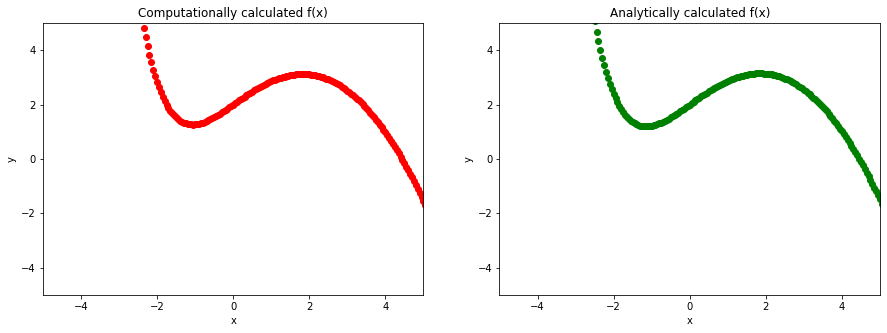

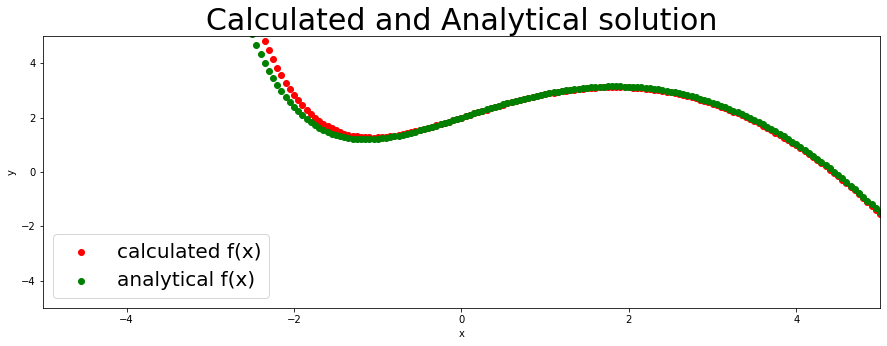

In [6]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(T, X0, c = 'red', label = 'calculated f(x)')
plt.title("Computationally calculated f(x)")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.subplot(1, 2, 2)
plt.scatter(variable, function, c = 'green', label = 'analytical f(x)')
plt.title("Analytically calculated f(x)")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()


plt.figure(figsize=(15, 5))
plt.title("Calculated and Analytical solution", fontsize = 30)
plt.scatter(T, X0, c = 'red', label = 'calculated f(x)')
plt.scatter(variable, function, c = 'green', label = 'analytical f(x)')
plt.legend(loc = 'lower left', fontsize = 20)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

The Schordinger equation is taken with a change of variables as

$$ \frac{d^2x}{dt^2} = -2mE x $$

where E is taken in the units of $\hbar^2$

In [7]:
#Question 3
#NOTE THE CHANGE OF VARIABLES
#differentiating variable is taken as t instead of x as given in the question
#x -> x_0
#dx/dt -> x_1
#for infinite square well, E_n = (n^2 pi^2)/(2 m L^L) in units of hbar squared

def g1(X, t = 0):                           #dx/dt = y = g1
    return X[1]

def g2_1(X, t = 0):                         #dy/dt = g2_1 for n = 1
    m = 1
    L = 2
    n = 1
    E = ((n**2)*(math.pi)**2)/(2*m*L**2)    
    return (-2*m*E*X[0])

def g2_2(X, t = 0):                         #dy/dt = g2_1 for n = 2
    m = 1
    L = 2
    n = 2
    E = ((n**2)*(math.pi)**2)/(2*m*L**2)
    return (-2*m*E*X[0])

F1 = [g1, g2_1]
F2 = [g1, g2_2]

t0 = 0           #initial condition taken at t0
tf = 2           #final condition taken at tf
x0 = 0           #x(t0)
xf = 0           #x(tf)
z_g = 2          #dx/dt at t0 guess
h = 0.05
epsilon = 0.01

V3, T3 = ml.Shootingclass.shooting1(x0, xf, z_g, t0, tf, F1, h, epsilon)
V4, T4 = ml.Shootingclass.shooting1(x0, xf, z_g, t0, tf, F2, h, epsilon)

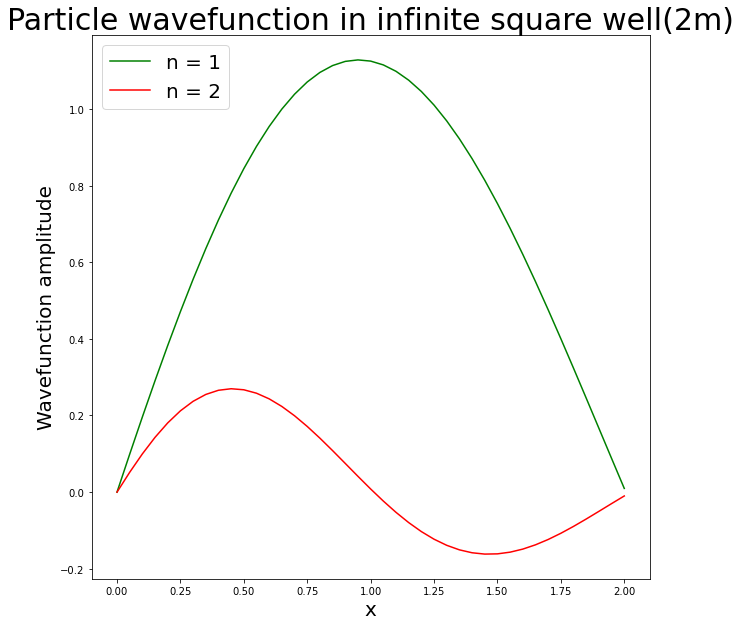

'These are not normalized'

In [13]:
fig = plt.figure(figsize=(10,10))
plt.title("Particle wavefunction in infinite square well(2m)", fontsize = 30)
plt.plot(T3, V3[0],'green', label = 'n = 1')
plt.plot(T4, V4[0],'red', label = 'n = 2')
plt.legend(loc = 'upper left', fontsize = 20)
plt.xlabel('x', fontsize = 20)
plt.ylabel('Wavefunction amplitude', fontsize = 20)
plt.show()

'''These are not normalized'''